# Proyek Klasifikasi Gambar: Animals Dataset]
- **Nama:** [Riffa Bella Wahyu S]
- **Email:** [mc444d5x0776@student.devacademy.id]
- **ID Dicoding:** [MC444D5X0776]

## Import Semua Packages/Library yang Digunakan

In [43]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
from tqdm import tqdm

# untuk melakukan visualisasi data
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# untuk pemrosesan data gambar
import cv2
from collections import defaultdict
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.layers import Input
from tensorflow.keras import Model, layers, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import TFSMLayer

# untuk menonaktifkan warning yang mungkin muncul
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


## Data Preparation

**Dataset yang digunakan**

Pada Klasifikasi gambar ini, menggunakan dataset animals yang berjumlah 26.200 data dengan 10 kelas didalmnya, yang terdiri dari kelas anjing, kuda, gajah, kupu-kupu, ayam, kucing, sapi, domba, laba-laba, dan tupai. Dengan setiap kelas memiliki nama sub foldernya yang menggunakan bahasa italia, sehingga perlu untuk mengubah nama subfolder dengan bahasa inggris, yang akan dilakukan setelah menload data.

### Data Loading

In [3]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bellawahyu","key":"c8717390016d24e448984bcd4d2a94dc"}'}

In [4]:
# Mengambil dan mendownload dataset dari kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset Animals-10 dari Kaggle
!kaggle datasets download -d alessiocorrado99/animals10

# Ekstrak zip dataset
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

### Mengubah nama direktori dan sub folder per kelas

In [5]:
# Mengubah nama direktori awal dataset setalah di ekstraksi
os.rename("raw-img", "animals")

# Direktori dataset
dataset = 'animals'

# Mapping nama folder lama ke nama folder baru
rename_map = {
    'cane': 'dogs',
    'cavallo': 'horses',
    'elefante': 'elephants',
    'farfalla': 'butterflys',
    'gallina': 'chickens',
    'gatto': 'cats',
    'mucca': 'cows',
    'pecora': 'sheeps',
    'ragno': 'spiders',
    'scoiattolo': 'squirrels',
}

# Loop untuk mengganti nama folder
for old_name, new_name in rename_map.items():
    old_path = os.path.join(dataset, old_name)
    new_path = os.path.join(dataset, new_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"Folder '{old_name}' diubah menjadi '{new_name}'")
    else:
        print(f"Folder '{old_name}' tidak ditemukan")

Folder 'cane' diubah menjadi 'dogs'
Folder 'cavallo' diubah menjadi 'horses'
Folder 'elefante' diubah menjadi 'elephants'
Folder 'farfalla' diubah menjadi 'butterflys'
Folder 'gallina' diubah menjadi 'chickens'
Folder 'gatto' diubah menjadi 'cats'
Folder 'mucca' diubah menjadi 'cows'
Folder 'pecora' diubah menjadi 'sheeps'
Folder 'ragno' diubah menjadi 'spiders'
Folder 'scoiattolo' diubah menjadi 'squirrels'


## Data Preprocessing

### Split Data

In [7]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath = 'animals'

file_name = []
labels = []
full_path = []

for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Masukkan variabel yang sudah dikumpulkan menjadi sebuah DataFrame agar rapi
df = pd.DataFrame({
    "path": full_path,
    "file_name": file_name,
    "labels": labels
})

# Melihat jumlah data gambar pada masing-masing label
print(df.groupby(['labels']).size())

labels
butterflys    2112
cats          1668
chickens      3098
cows          1866
dogs          4863
elephants     1446
horses        2623
sheeps        1820
spiders       4821
squirrels     1862
dtype: int64


In [9]:
X = df['path']
y = df['labels']

# Split ke train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=300)

# Gabungkan ke dataframe
df_tr = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_te = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Print ukuran data
print('train size:', len(df_tr))
print('test size :', len(df_te))

# Gabungkan semua dataframe
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('\n=====================================================')
print(df_all.groupby(['set', 'labels']).size())
print('=====================================================\n')

# Cek sample
print(df_all.sample(5))

# Path sumber dan tujuan
datasource_path = "animals"
dataset_path = "animals/Dataset-Final/"

# Salin gambar ke folder baru sesuai set dan label
for index, row in tq(df_all.iterrows(), total=len(df_all)):
    file_path = row['path']
    label = row['labels']
    subset = row['set']

    dest_folder = os.path.join(dataset_path, subset, label)
    os.makedirs(dest_folder, exist_ok=True)

    file_name = os.path.basename(file_path)
    dest_path = os.path.join(dest_folder, file_name)

    if not os.path.exists(dest_path):
        shutil.copy2(file_path, dest_path)

train size: 20943
test size : 5236

set    labels    
test   butterflys     422
       cats           334
       chickens       620
       cows           373
       dogs           973
       elephants      289
       horses         525
       sheeps         364
       spiders        964
       squirrels      372
train  butterflys    1690
       cats          1334
       chickens      2478
       cows          1493
       dogs          3890
       elephants     1157
       horses        2098
       sheeps        1456
       spiders       3857
       squirrels     1490
dtype: int64

                                                    path     labels    set
25954  animals/sheeps/OIP-uZxrSRfMLQ2dlCQunM7hywHaFR....     sheeps   test
2429   animals/squirrels/OIP-2SxBWLq3JZHphB2xxkXI7QAA...  squirrels  train
4905    animals/cows/OIP-8KtVZEYRvfuSXPPolx6zEQHaFj.jpeg       cows  train
10571  animals/horses/OIP-5w4861bwgkhhIXFkHjavngAAAA....     horses  train
19711  animals/squirrels/OIP-wL1OHqiT

  0%|          | 0/26179 [00:00<?, ?it/s]

### Augmentasi

In [13]:
SOURCE_BASE = "animals/Dataset-Final/train"
# Path hasil augmentasi
AUGMENTED_BASE = "animals/Dataset-Augmented/train"

# Daftar label
labels = ['butterflys', 'cats', 'chickens', 'cows', 'dogs', 'elephants', 'horses', 'sheeps', 'spiders', 'squirrels']

# Objek ImageDataGenerator dengan parameter augmentasi
augmentor = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Jumlah augmentasi yang ingin dilakukan per gambar
AUGMENT_PER_IMAGE = 3

for label in labels:
    source_dir = os.path.join(SOURCE_BASE, label)
    dest_dir = os.path.join(AUGMENTED_BASE, label)
    os.makedirs(dest_dir, exist_ok=True)

    print(f"Augmenting class '{label}'...")
    for image_name in tqdm(os.listdir(source_dir)):
        img_path = os.path.join(source_dir, image_name)
        try:
            img = load_img(img_path, target_size=(150, 150))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            gen = augmentor.flow(x, batch_size=1)
            for i in range(AUGMENT_PER_IMAGE):
                batch = next(gen)
                aug_img = array_to_img(batch[0])
                aug_name = f"{os.path.splitext(image_name)[0]}_aug_{i}.jpg"
                aug_img.save(os.path.join(dest_dir, aug_name))

            # Salin juga gambar aslinya ke folder augmentasi
            img.save(os.path.join(dest_dir, image_name))

        except Exception as e:
            print(f"Error processing {img_path}: {e}")

Augmenting class 'butterflys'...


100%|██████████| 1690/1690 [00:29<00:00, 58.13it/s]


Augmenting class 'cats'...


100%|██████████| 1334/1334 [00:25<00:00, 51.61it/s]


Augmenting class 'chickens'...


100%|██████████| 2478/2478 [00:40<00:00, 60.92it/s]


Augmenting class 'cows'...


100%|██████████| 1493/1493 [00:24<00:00, 61.75it/s]


Augmenting class 'dogs'...


100%|██████████| 3890/3890 [01:03<00:00, 61.35it/s]


Augmenting class 'elephants'...


100%|██████████| 1157/1157 [00:19<00:00, 58.64it/s]


Augmenting class 'horses'...


100%|██████████| 2098/2098 [00:34<00:00, 61.00it/s]


Augmenting class 'sheeps'...


100%|██████████| 1456/1456 [00:24<00:00, 60.42it/s]


Augmenting class 'spiders'...


100%|██████████| 3857/3857 [01:02<00:00, 61.51it/s]


Augmenting class 'squirrels'...


100%|██████████| 1490/1490 [00:24<00:00, 61.09it/s]


In [15]:
TRAIN_DIR = "animals/Dataset-Augmented/train"
TEST_DIR = "animals/Dataset-Final/test"

print("Jumlah gambar di training set:")
for class_name in os.listdir(TRAIN_DIR):
    class_path = os.path.join(TRAIN_DIR, class_name)
    if os.path.isdir(class_path):
        print(f"- {class_name}: {len(os.listdir(class_path))} gambar")

print("\nJumlah gambar di testing set:")
for class_name in os.listdir(TEST_DIR):
    class_path = os.path.join(TEST_DIR, class_name)
    if os.path.isdir(class_path):
        print(f"- {class_name}: {len(os.listdir(class_path))} gambar")


Jumlah gambar di training set:
- butterflys: 6760 gambar
- elephants: 4628 gambar
- sheeps: 5824 gambar
- squirrels: 5960 gambar
- horses: 8392 gambar
- cats: 5336 gambar
- chickens: 9912 gambar
- spiders: 15428 gambar
- dogs: 15560 gambar
- cows: 5972 gambar

Jumlah gambar di testing set:
- butterflys: 422 gambar
- elephants: 289 gambar
- sheeps: 364 gambar
- squirrels: 372 gambar
- horses: 525 gambar
- cats: 334 gambar
- chickens: 620 gambar
- spiders: 964 gambar
- dogs: 973 gambar
- cows: 373 gambar


In [16]:
# Buat objek ImageDataGenerator untuk training dan validasi
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

# Untuk test tidak perlu validation split
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk training data
train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',  # karena 3 kelas (cats, dogs, snakes)
    subset='training',
    shuffle=True
)

# Generator untuk validation data
validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Generator untuk test data
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=1,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

Found 67021 images belonging to 10 classes.
Found 16751 images belonging to 10 classes.
Found 5236 images belonging to 10 classes.


## Modelling

In [22]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Clear session
tf.keras.backend.clear_session()

# Load MobileNetV2 tanpa bagian classification (top)
base_model = MobileNetV2(
    input_shape=(150, 150, 3),  # Input shape harus 3 channel
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze dulu agar hanya dense layer yang dilatih

model_mobilenet = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Kompilasi model
model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_mobilenet.summary()

earlystop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

callbacks_list = [earlystop, reduce_lr]

<ipython-input-22-245cfec4a1e4>:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,012,554 (11.49 MB)

 Trainable params: 754,570 (2.88 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
train_class_counts = {class_name: len(os.listdir(os.path.join(TRAIN_DIR, class_name)))
                      for class_name in os.listdir(TRAIN_DIR) if os.path.isdir(os.path.join(TRAIN_DIR, class_name))}

# Total gambar dan jumlah kelas
total_train = sum(train_class_counts.values())
n_classes = len(train_class_counts)

# Hitung class weights
class_weights = {i: (1 / count) * (total_train / n_classes)
                 for i, (label, count) in enumerate(train_class_counts.items())}

print("Class Weights:", class_weights)

history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=validation_generator,
    class_weight=class_weights,       # Tetap gunakan class weight
    callbacks=callbacks_list          # EarlyStopping dan ReduceLROnPlateau
)

Class Weights: {0: 1.2392307692307694, 1: 1.810112359550562, 2: 1.4383928571428575, 3: 1.4055704697986577, 4: 0.9982364156339372, 5: 1.5699400299850075, 6: 0.8451573849878935, 7: 0.5429867772880477, 8: 0.5383804627249358, 9: 1.402746148693905}
Epoch 1/50
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 101s 43ms/step - accuracy: 0.6345 - loss: 1.1404 - val_accuracy: 0.8607 - val_loss: 0.4494 - learning_rate: 1.0000e-04
Epoch 2/50
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.8418 - loss: 0.5224 - val_accuracy: 0.8555 - val_loss: 0.4566 - learning_rate: 1.0000e-04
Epoch 3/50
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.8718 - loss: 0.4254 - val_accuracy: 0.8750 - val_loss: 0.3993 - learning_rate: 1.0000e-04
Epoch 4/50
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.8882 - loss: 0.3698 - val_accuracy: 0.8669 - val_loss: 0.4403 - learning_rate: 1.0000e-04
Epoch 5/50
2095/2095 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9020 - loss: 0.3168 - val_accuracy: 0.8743 - 

## Evaluasi dan Visualisasi

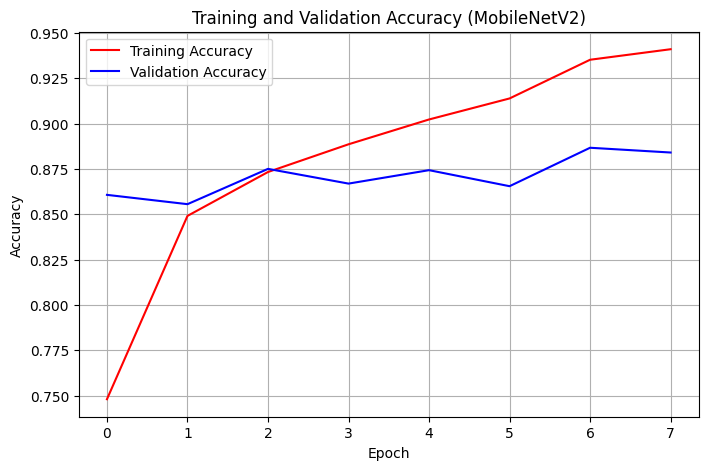

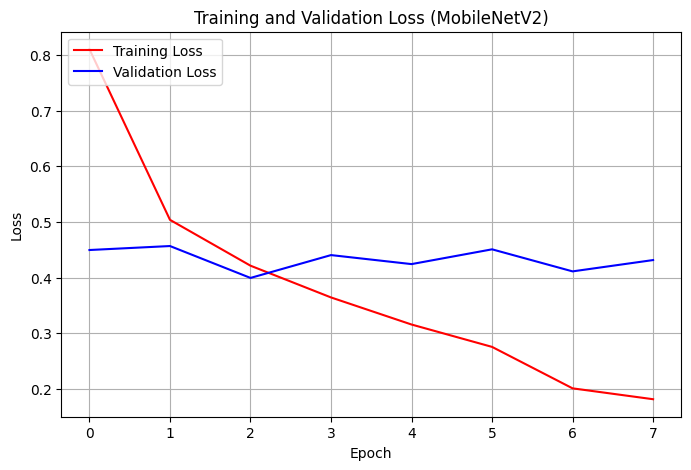

In [24]:
# Mengambil akurasi dan loss dari history training MobileNet
acc = history_mobilenet.history['accuracy']
val_acc = history_mobilenet.history['val_accuracy']
loss = history_mobilenet.history['loss']
val_loss = history_mobilenet.history['val_loss']

# Menentukan jumlah epoch
epochs = range(len(acc))

# Plot grafik akurasi
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot grafik loss
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [27]:
loss, acc = model_mobilenet.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")
print(f"Test Loss: {loss*100:.2f}%")

5236/5236 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - accuracy: 0.9352 - loss: 0.2242
Test Accuracy: 91.62%
Test Loss: 28.66%


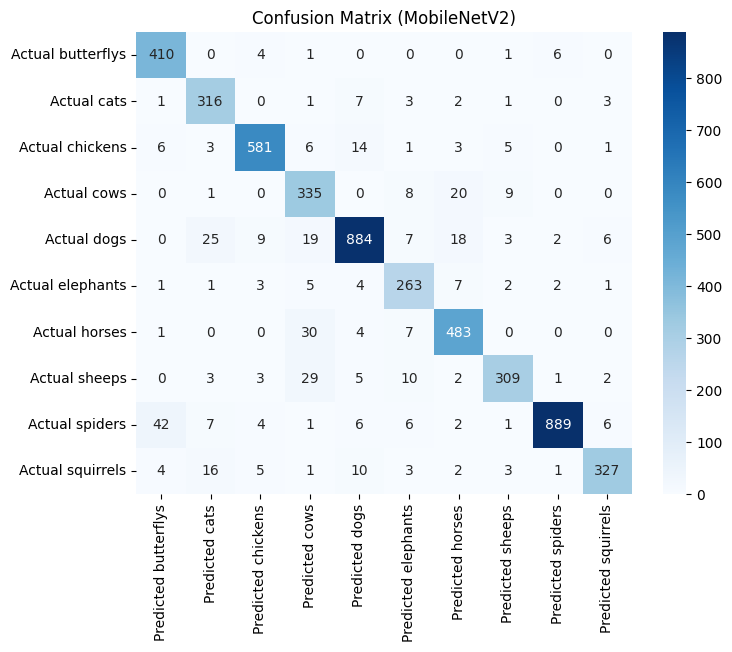


Classification Report (MobileNetV2):

              precision    recall  f1-score   support

  butterflys     0.8817    0.9716    0.9245       422
        cats     0.8495    0.9461    0.8952       334
    chickens     0.9540    0.9371    0.9455       620
        cows     0.7827    0.8981    0.8365       373
        dogs     0.9465    0.9085    0.9271       973
   elephants     0.8539    0.9100    0.8811       289
      horses     0.8961    0.9200    0.9079       525
      sheeps     0.9251    0.8489    0.8854       364
     spiders     0.9867    0.9222    0.9534       964
   squirrels     0.9451    0.8790    0.9109       372

    accuracy                         0.9162      5236
   macro avg     0.9021    0.9142    0.9067      5236
weighted avg     0.9200    0.9162    0.9169      5236



In [26]:
# Reset test generator untuk menghindari duplikasi data
test_generator.reset()

# Melakukan prediksi menggunakan MobileNetV2
preds_mobilenet = model_mobilenet.predict(test_generator, verbose=0)

# Mengambil label prediksi dengan nilai probabilitas tertinggi (argmax)
y_pred = np.argmax(preds_mobilenet, axis=1)

# Label asli (tersedia di test_generator.classes)
y_true = test_generator.classes

# Daftar nama kelas dari test_generator
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = pd.DataFrame(
    data=confusion_matrix(y_true, y_pred),
    index=[f"Actual {label}" for label in class_labels],
    columns=[f"Predicted {label}" for label in class_labels]
)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (MobileNetV2)")
plt.show()

# Classification Report
print("\nClassification Report (MobileNetV2):\n")
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))

**Insight:**
*   Accuracy model yang dihasilkan mencapai 91.62%, yang menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam mengklasifikasikan gambar secara keseluruhan.
*   Kelas dengan performa terbaik, didapat pada kelas **spiders** yang memiliki precision sangat tinggi (0.9867) dan recall yang sangat baik (0.9222), sehingga model sangat baik dalam mengidentifikasi gambar spiders dengan akurat.
*   Kelas dengan performa kurang baik, didapat pada kelas **cows** yang memiliki nilai precision yang paling rendah dari kelas lainnya (0.7827), meskipun recall yang didapat baik (0.8981), sehingga model mungkin sering melakukan kesalahan dalam mengklasifikasikan gambar cows, tetapi saat berhasil, model cenderung berhasil mendeteksi gambar tersebut dengan baik.





## Konversi Model

### Saved Model

In [30]:
model_mobilenet.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132984383073808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383072080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383074576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383072848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383073616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383073040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984006330704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984006331280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984383073232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132984006331088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13298400633243

### TF-Lite

In [31]:
# Pastikan path SavedModel benar
saved_model_path = 'saved_model'
tflite_output_path = 'tflite/model.tflite'
label_output_path = 'tflite/label.txt'

# Buat folder output jika belum ada
os.makedirs(os.path.dirname(tflite_output_path), exist_ok=True)

# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
tflite_model = converter.convert()

# Simpan model .tflite
with open(tflite_output_path, 'wb') as f:
    f.write(tflite_model)
print(f"Model TFLite berhasil disimpan di: {tflite_output_path}")

# Gunakan class_names
try:
    class_name
except NameError:
    class_name = ['butterflys', 'cats', 'chickens', 'cows', 'dogs', 'elephants', 'horses', 'sheeps', 'spiders', 'squirrels']
    print("'class_names' tidak ditemukan, menggunakan default label Intel.")

# Simpan label ke file
with open(label_output_path, 'w') as f:
    for label in class_name:
        f.write(label + '\n')
print(f"Label kelas berhasil disimpan di: {label_output_path}")

Model TFLite berhasil disimpan di: tflite/model.tflite
Label kelas berhasil disimpan di: tflite/label.txt


### TFJS

In [32]:
!pip install tensorflowjs
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    --output_format=tfjs_graph_model \
    saved_model \
    tfjs_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
2025-04-22 17:12:22.427714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745341942.447904   28246 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:174

## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


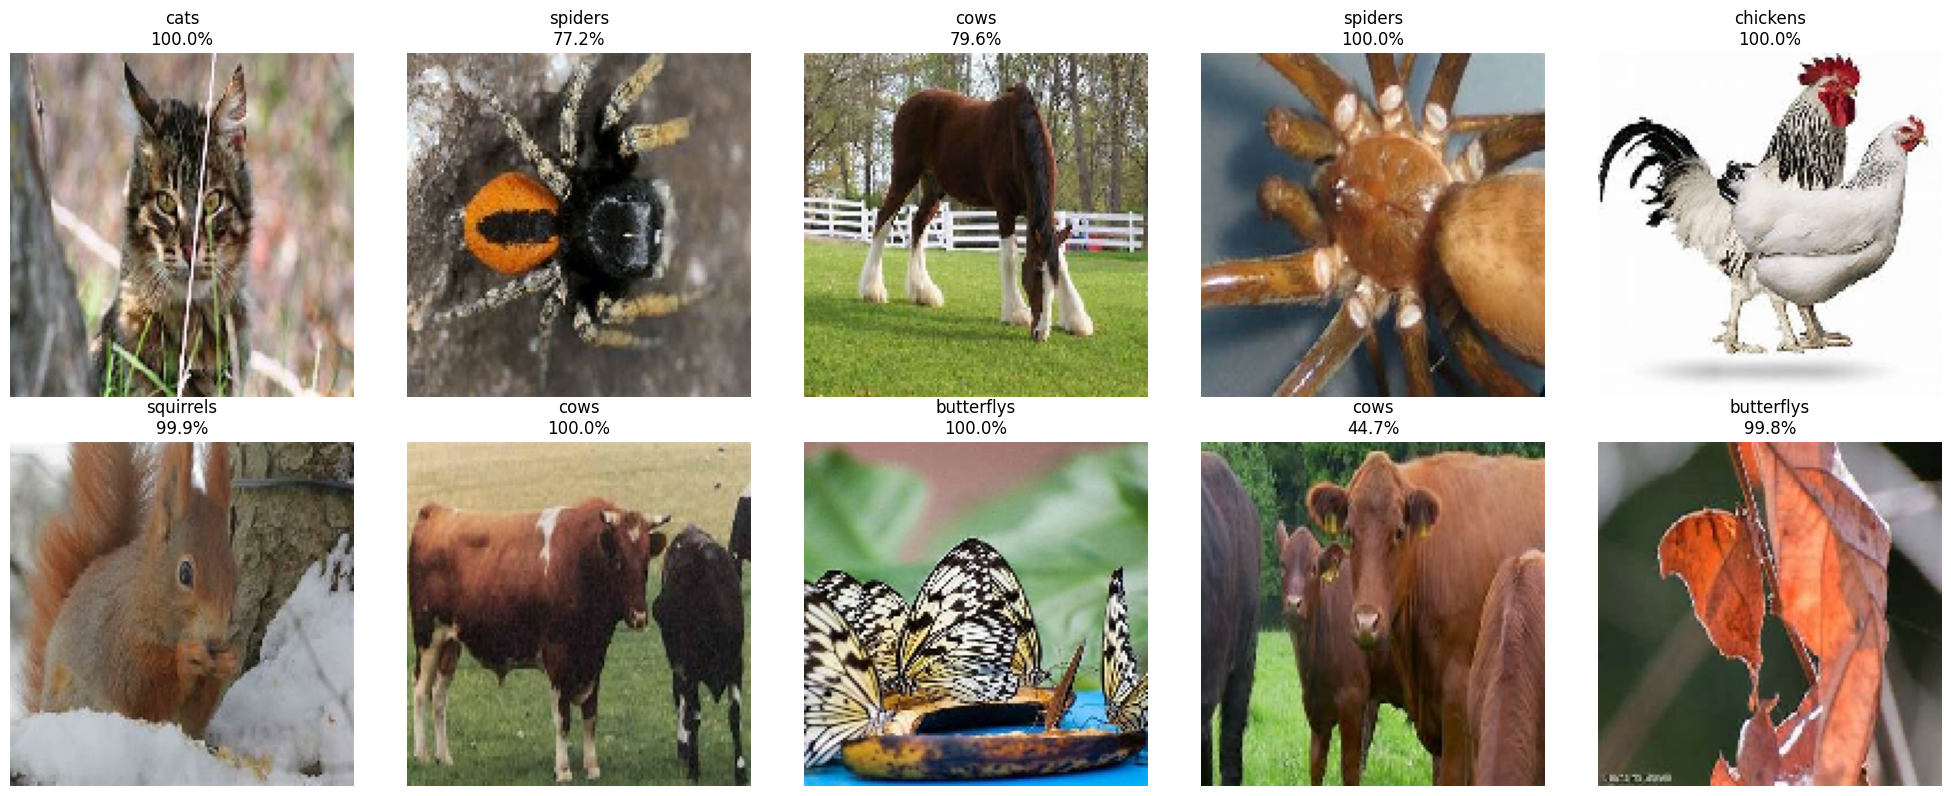

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Gambar ke-1: 810.jpeg
Prediksi: cats
Confidence per class:
  butterflys: 0.00%
  cats      : 100.00%
  chickens  : 0.00%
  cows      : 0.00%
  dogs      : 0.00%
  elephants : 0.00%
  horses    : 0.00%
  sheeps    : 0.00%
  spiders   : 0.00%
  squirrels : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Gambar ke-2: OIP-GrU-RyxrndIcRrRABRUqJgHaE7.jpeg
Prediksi: spiders
Confidence per class:
  butterflys: 22.60%
  cats      : 0.09%
  chickens  : 0.01%
  cows      : 0.01%
  dogs      : 0.06%
  elephants : 0.00%
  horses    : 0.01%
  sheeps    : 0.00%
  spiders   : 77.20%
  squirrels : 0.02%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Gambar ke-3: OIP-QIPhspm8New-TXYDwliTCgHaFj.jpeg
Prediksi: cows
Confidence per class:
  butterflys: 0.00%
  cats      : 0.00%
  chickens  : 0.07%
  cows      : 79.59%
  dogs      : 0.26%
  elephants : 0.22%
  horses    : 19.58%
  sheeps    : 0.27%
  spiders   : 0.00%
  squirrels : 0.01%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

Gamb

In [41]:
# Load class name dari folder test
test_dir = 'animals/Dataset-Final/test'
class_name = sorted(os.listdir(test_dir))  # ['butterflys', 'cats', 'chickens', ...]

# Ambil semua path gambar dari subfolder dalam test_dir
all_image_files = []
for class_folder in class_name:
    class_path = os.path.join(test_dir, class_folder)
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_image_files.append(os.path.join(class_path, fname))

# Ambil 8 gambar secara acak
random_image_files = random.sample(all_image_files, 10)

# Visualisasi dan prediksi
plt.figure(figsize=(20, 8))

for i, img_path in enumerate(random_image_files):
    # Load dan preprocessing gambar
    img = image.load_img(img_path, target_size=(150, 150))  # ganti 150x150 jika model kamu input-nya begitu
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    pred = model_mobilenet.predict(img_array)
    predicted_class = class_name[np.argmax(pred)]

    # Tampilkan gambar dan hasil prediksi
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{predicted_class}\n{np.max(pred)*100:.1f}%')

plt.tight_layout()
plt.show()

# Print confidence setiap kelas
for i, img_path in enumerate(random_image_files):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model_mobilenet.predict(img_array)
    predicted_class = class_name[np.argmax(pred)]

    print(f'\nGambar ke-{i+1}: {os.path.basename(img_path)}')
    print(f'Prediksi: {predicted_class}')
    print("Confidence per class:")
    for j, label in enumerate(class_name):
        print(f"  {label:10s}: {pred[0][j]*100:.2f}%")


### Inference menggunakan SavedModel

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


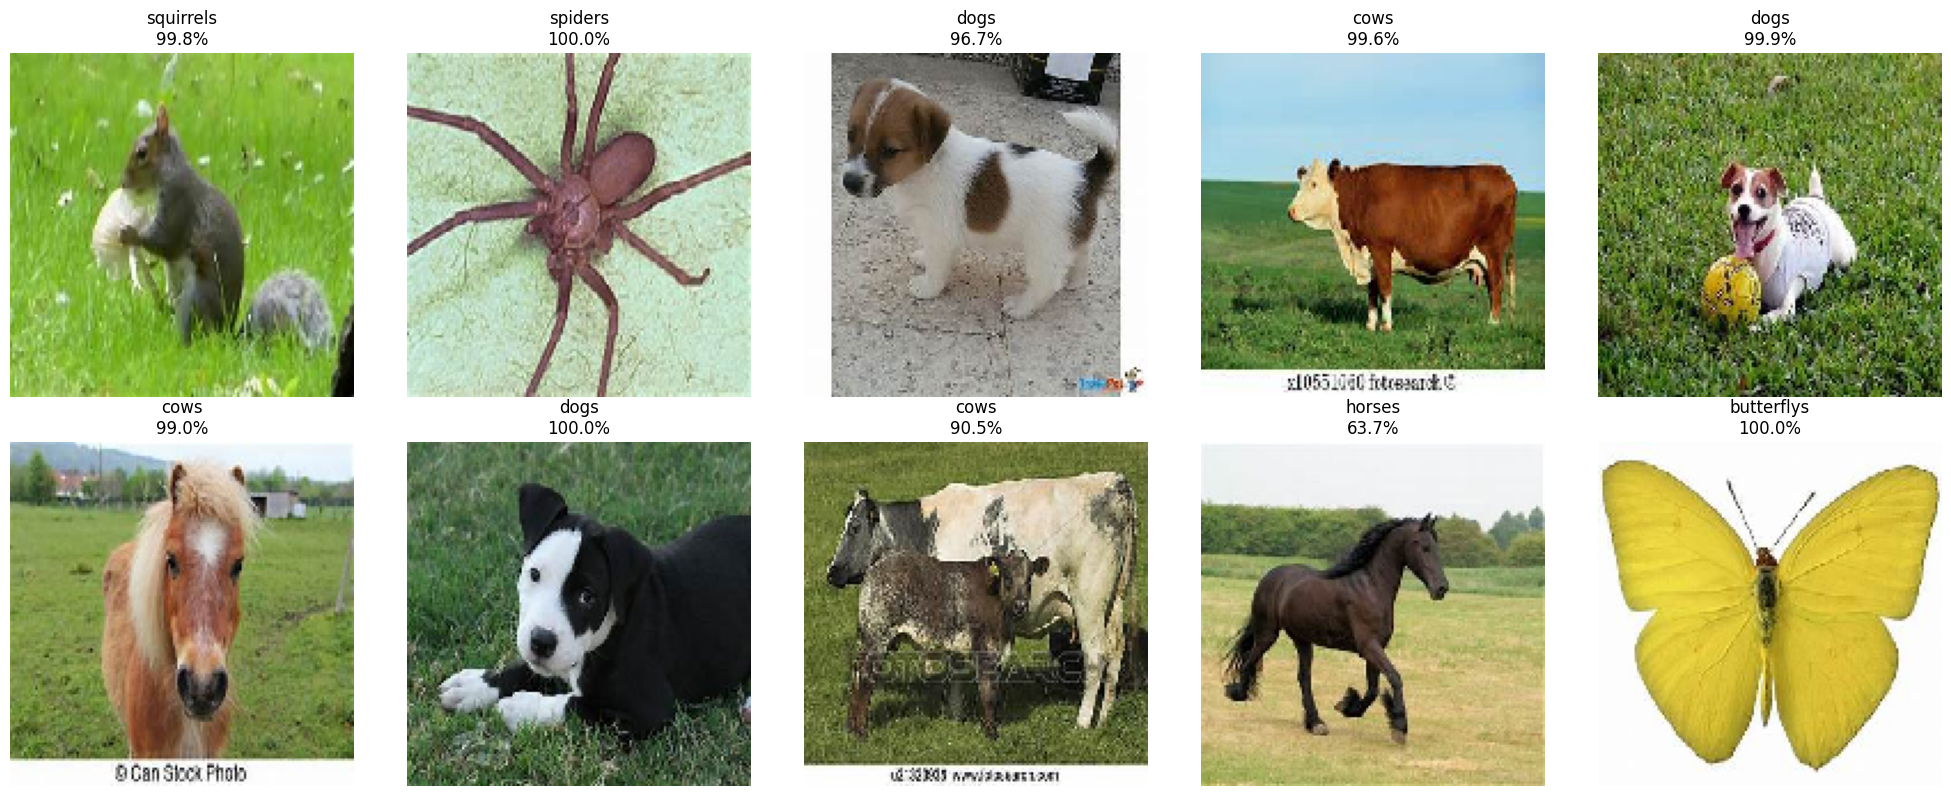

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Gambar ke-1: OIP-e7Vem51OkXzkfsWrlj32aAHaEK.jpeg
Prediksi: squirrels
Confidence per class:
  butterflys: 0.00%
  cats      : 0.08%
  chickens  : 0.01%
  cows      : 0.02%
  dogs      : 0.05%
  elephants : 0.01%
  horses    : 0.05%
  sheeps    : 0.01%
  spiders   : 0.01%
  squirrels : 99.75%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

Gambar ke-2: OIP-ViRHjsHw2zYc5AjCpIIJ4wHaE2.jpeg
Prediksi: spiders
Confidence per class:
  butterflys: 0.00%
  cats      : 0.00%
  chickens  : 0.00%
  cows      : 0.00%
  dogs      : 0.00%
  elephants : 0.00%
  horses    : 0.00%
  sheeps    : 0.00%
  spiders   : 100.00%
  squirrels : 0.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Gambar ke-3: OIP-BvtejiD8U2SEGQ6NjDt3igHaGq.jpeg
Prediksi: dogs
Confidence per class:
  butterflys: 0.03%
  cats      : 0.84%
  chickens  : 0.09%
  cows      : 0.41%
  dogs      : 96.68%
  elephants : 0.47%
  horses    : 0.07%
  sheeps    : 0.94%
  spiders   : 0.06%
  squirrels : 0.41%
1/1 ━━━━━━━━━

In [44]:
# Load model dari SavedModel pakai TFSMLayer (Keras 3)
saved_model_path = 'saved_model'
reloaded_layer = TFSMLayer(saved_model_path, call_endpoint='serving_default')

def predict_with_saved_model(img_array):
    pred_dict = reloaded_layer(img_array)
    logits = pred_dict['output_0']
    return tf.nn.softmax(logits).numpy()

# Load class name dari folder test
test_dir = 'animals/Dataset-Final/test'
class_name = sorted(os.listdir(test_dir))  # ['butterflys', 'cats', 'chickens', ...]

# Ambil semua path gambar dari subfolder dalam test_dir
all_image_files = []
for class_folder in class_name:
    class_path = os.path.join(test_dir, class_folder)
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_image_files.append(os.path.join(class_path, fname))

# Ambil 8 gambar secara acak
random_image_files = random.sample(all_image_files, 10)

# Visualisasi dan prediksi
plt.figure(figsize=(20, 8))

for i, img_path in enumerate(random_image_files):
    # Load dan preprocessing gambar
    img = image.load_img(img_path, target_size=(150, 150))  # ganti 150x150 jika model kamu input-nya begitu
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    pred = model_mobilenet.predict(img_array)
    predicted_class = class_name[np.argmax(pred)]

    # Tampilkan gambar dan hasil prediksi
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{predicted_class}\n{np.max(pred)*100:.1f}%')

plt.tight_layout()
plt.show()

# Print confidence setiap kelas
for i, img_path in enumerate(random_image_files):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model_mobilenet.predict(img_array)
    predicted_class = class_name[np.argmax(pred)]

    print(f'\nGambar ke-{i+1}: {os.path.basename(img_path)}')
    print(f'Prediksi: {predicted_class}')
    print("Confidence per class:")
    for j, label in enumerate(class_name):
        print(f"  {label:10s}: {pred[0][j]*100:.2f}%")
